In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Data

In [2]:
#dim ethin
dim = 38

n_electrons = 14

In [3]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethin_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethin_6-31g**.npy"), dim), 
)

[-] 2018-04-28 14:30:34: Data set normalized. Mean value std: 0.02649493087789863


# Ethin
dim = 38

dim^2 = 2304

dim_ut = 1176

In [4]:
dim_triu = int(dim * (dim + 1) / 2)

In [9]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_triu, dim_triu, dim_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset,
    convergence_threshold=5e-7
)
graph = trainer.graph

[ ] 2018-04-28 14:50:01: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7fd8ba9d3eb8>
[-] 2018-04-28 14:50:01: Setting up the training in the target graph ...
[-] 2018-04-28 14:50:01: network ...
[-] 2018-04-28 14:50:01: error function ...
[-] 2018-04-28 14:50:01: cost function ...
[-] 2018-04-28 14:50:01: training step
[-] 2018-04-28 14:50:01: Starting network training ...
[ ] 2018-04-28 14:50:01: Val. Cost: 1.759E-02. Error: 1.759E-02. Diff: 1.0E+10
[ ] 2018-04-28 14:50:03: Val. Cost: 4.145E-05. Error: 3.758E-05. Diff: 1.8E-02
[ ] 2018-04-28 14:50:06: Val. Cost: 1.276E-04. Error: 1.240E-04. Diff: 8.6E-05
[ ] 2018-04-28 14:50:08: Val. Cost: 6.616E-05. Error: 6.280E-05. Diff: 6.1E-05
[ ] 2018-04-28 14:50:10: Val. Cost: 3.618E-05. Error: 3.298E-05. Diff: 3.0E-05
[ ] 2018-04-28 14:50:13: Val. Cost: 3.463E-05. Error: 3.162E-05. Diff: 1.4E-06
[ ] 2018-04-28 14:50:16: Val. Cost: 3.365E-05. Error: 3.081E-05. Diff: 8.1E-07
[ ] 2018-04-28 14:50:19: Val. Cost: 1.597E-05.

In [10]:
p = network.run(sess, dataset.testing[0])

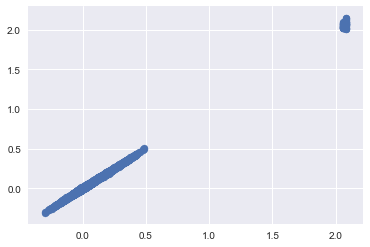

In [11]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [12]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-28 14:50:54: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:55: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:55: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:55: Iteration calculation: 3
[ ] 2018-04-28 14:50:56: Iteration calculation: 4


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:56: Iteration calculation: 5
[ ] 2018-04-28 14:50:56: Iteration calculation: 6


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:56: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:57: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:57: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:57: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:58: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:58: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:58: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:59: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:59: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:50:59: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:00: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:00: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:00: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:00: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:01: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:01: Iteration calculation: 22
[ ] 2018-04-28 14:51:01: Iteration calculation: 23
[ ] 2018-04-28 14:51:02: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:02: Iteration calculation: 25
[ ] 2018-04-28 14:51:02: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:02: Iteration calculation: 27
[ ] 2018-04-28 14:51:03: Iteration calculation: 28


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:03: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:04: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:04: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:04: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:05: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:05: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:05: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:06: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:06: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:07: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:07: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:07: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:08: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:08: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:08: Iteration calculation: 43
[ ] 2018-04-28 14:51:09: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:09: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:09: Iteration calculation: 46
[ ] 2018-04-28 14:51:10: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:10: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:10: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [13]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.01195E-03 +- 4.05077E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
3.07343E-03 +- 6.32053E-04
--- Occupance Error ---
1.07001E-01 +- 8.32473E-02
--- Avg. Iterations ---
1.82400E+01 +- 6.08789E+00



## McWheeny that shit

In [14]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [15]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [16]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [17]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-28 14:51:11: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:11: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:12: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:12: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:13: Iteration calculation: 4
[ ] 2018-04-28 14:51:13: Iteration calculation: 5


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:13: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:14: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:14: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:15: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:15: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:15: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:16: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:17: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:17: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:18: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:18: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:18: Iteration calculation: 17
[ ] 2018-04-28 14:51:19: Iteration calculation: 18


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:19: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:19: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:20: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:20: Iteration calculation: 22
[ ] 2018-04-28 14:51:21: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:21: Iteration calculation: 24
[ ] 2018-04-28 14:51:21: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:21: Iteration calculation: 26
[ ] 2018-04-28 14:51:21: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:21: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:22: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:22: Iteration calculation: 30
[ ] 2018-04-28 14:51:22: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:23: Iteration calculation: 32
[ ] 2018-04-28 14:51:23: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:23: Iteration calculation: 34
[ ] 2018-04-28 14:51:23: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:24: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:24: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:24: Iteration calculation: 38
[ ] 2018-04-28 14:51:25: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:25: Iteration calculation: 40
[ ] 2018-04-28 14:51:25: Iteration calculation: 41


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:25: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:26: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:26: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:26: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:27: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:27: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:27: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:27: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [18]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.16067E-03 +- 2.73728E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
7.90825E-05 +- 4.31302E-05
--- Occupance Error ---
5.16415E-03 +- 6.23220E-03
--- Avg. Iterations ---
1.83000E+01 +- 6.10000E+00



In [19]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-28 14:51:28: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:28: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:29: Iteration calculation: 2
[ ] 2018-04-28 14:51:29: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:29: Iteration calculation: 4
[ ] 2018-04-28 14:51:29: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:29: Iteration calculation: 6
[ ] 2018-04-28 14:51:30: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:30: Iteration calculation: 8
[ ] 2018-04-28 14:51:30: Iteration calculation: 9


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:30: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:31: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:31: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:31: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:32: Iteration calculation: 14
[ ] 2018-04-28 14:51:32: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:32: Iteration calculation: 16
[ ] 2018-04-28 14:51:32: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:32: Iteration calculation: 18
[ ] 2018-04-28 14:51:33: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:33: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:33: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:33: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:34: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:34: Iteration calculation: 24
[ ] 2018-04-28 14:51:34: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:34: Iteration calculation: 26
[ ] 2018-04-28 14:51:35: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:35: Iteration calculation: 28
[ ] 2018-04-28 14:51:35: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:35: Iteration calculation: 30
[ ] 2018-04-28 14:51:35: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:36: Iteration calculation: 32
[ ] 2018-04-28 14:51:36: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:36: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:36: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:37: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:37: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:38: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:38: Iteration calculation: 39
[ ] 2018-04-28 14:51:38: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:38: Iteration calculation: 41
[ ] 2018-04-28 14:51:39: Iteration calculation: 42


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:39: Iteration calculation: 43
[ ] 2018-04-28 14:51:39: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:39: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:40: Iteration calculation: 46
[ ] 2018-04-28 14:51:40: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:40: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:51:40: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [20]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.15508E-03 +- 2.71785E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.62362E-17 +- 4.25399E-18
--- Occupance Error ---
1.52767E-15 +- 1.32978E-15
--- Avg. Iterations ---
1.83000E+01 +- 6.10000E+00



## Classical Ethan

In [21]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [23]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-28 14:52:16: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:17: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:17: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:18: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:18: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:19: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:19: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:20: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:21: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:21: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:22: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:22: Iteration calculation: 11
[ ] 2018-04-28 14:52:22: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:23: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:24: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:24: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:24: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:25: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:25: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:26: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:26: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:27: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:27: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:28: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:28: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:28: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:29: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:29: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:30: Iteration calculation: 28
[ ] 2018-04-28 14:52:30: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:31: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:32: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:32: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:32: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:33: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:33: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:33: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:34: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:34: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:34: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:35: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:35: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:35: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:36: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:36: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:37: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:37: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:37: Iteration calculation: 47
[ ] 2018-04-28 14:52:38: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:38: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [24]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.26847E-02 +- 1.84352E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.17212E-02 +- 1.64660E-03
--- Occupance Error ---
3.16192E-15 +- 1.71453E-15
--- Avg. Iterations ---
2.32800E+01 +- 1.03171E+01



In [25]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-28 14:52:38: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:38: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:39: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:39: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:40: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:40: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:40: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:41: Iteration calculation: 7
[ ] 2018-04-28 14:52:41: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:41: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:41: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:42: Iteration calculation: 11
[ ] 2018-04-28 14:52:42: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:42: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:42: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:43: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:43: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:43: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:43: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:44: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:44: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:45: Iteration calculation: 21
[ ] 2018-04-28 14:52:45: Iteration calculation: 22


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:45: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:45: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:46: Iteration calculation: 25
[ ] 2018-04-28 14:52:46: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:46: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:47: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:47: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:47: Iteration calculation: 30
[ ] 2018-04-28 14:52:48: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:48: Iteration calculation: 32
[ ] 2018-04-28 14:52:48: Iteration calculation: 33


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:48: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:49: Iteration calculation: 35
[ ] 2018-04-28 14:52:49: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:49: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:49: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:50: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:50: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:50: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:50: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:51: Iteration calculation: 43
[ ] 2018-04-28 14:52:51: Iteration calculation: 44

Warn: Ipython shell catchs sys.args


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:51: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:51: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:52: Iteration calculation: 47
[ ] 2018-04-28 14:52:52: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:52: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [26]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.11571E-02 +- 2.04456E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.14813E-02 +- 1.91710E-03
--- Occupance Error ---
1.29133E-02 +- 5.10602E-05
--- Avg. Iterations ---
2.31400E+01 +- 1.04077E+01



In [27]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_gwh)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-28 14:52:52: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:53: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:53: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:53: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:54: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:54: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:55: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:55: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:55: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:56: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:56: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:57: Iteration calculation: 11
[ ] 2018-04-28 14:52:57: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:58: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:58: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:58: Iteration calculation: 15
[ ] 2018-04-28 14:52:59: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:59: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:52:59: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:00: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:00: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:01: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:01: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:02: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:02: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:03: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:03: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:03: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:04: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:04: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:05: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:06: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:06: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:06: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:07: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:07: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:07: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:07: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:08: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:08: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:09: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:09: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:09: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:10: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:10: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:10: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:11: Iteration calculation: 46
[ ] 2018-04-28 14:53:11: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:11: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-28 14:53:11: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [28]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.59514E-02 +- 2.57934E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
5.56022E-17 +- 1.54213E-17
--- Occupance Error ---
4.08562E-15 +- 3.26096E-15
--- Avg. Iterations ---
2.44200E+01 +- 9.56680E+00

